# NLP Lab Task — Preprocessing to Deployment with Twitter Sentiment Dataset

## Overview

This lab takes students through the **entire NLP pipeline** using a **Twitter Sentiment Analysis dataset** (tweets labeled as positive, negative, or neutral). Students will preprocess the data, represent it using multiple methods, train classical machine learning models, evaluate their results, and finally build a small API for deployment.

---

## Learning Objectives

* Apply text preprocessing (regex, case folding, tokenization, stopword removal, punctuation handling).
* Compare stemming and lemmatization, and use POS tagging to analyze counts of nouns, verbs, and adjectives.
* Build text representations using **Bag-of-Words**, **TF–IDF**, and **Word2Vec**.
* Train classical ML models inside an sklearn **Pipeline**.
* Evaluate models with standard metrics and perform basic error analysis.
* Save a trained pipeline and build a simple API to serve predictions.

---

## Dataset

We will use the **Sentiment140 Twitter dataset** (1.6M tweets, labeled positive/negative). For simplicity, you can work with a smaller balanced subset (e.g., 10k–20k tweets). This dataset is widely used for sentiment analysis and contains real, noisy text with mentions, hashtags, and emoticons.

Dataset link: [Sentiment140](http://help.sentiment140.com/for-students/)

---

## Step-by-Step Tasks

### 1) Exploratory Data Analysis (EDA)

* Load dataset, show class distribution, tweet length histogram, and a few sample tweets.
* Deliverable: 3 plots (class balance, length histogram, top frequent tokens) + 5 example tweets.

### 2) Regex Cleaning

* Remove URLs, mentions (@user), hashtags, emojis (or replace with tokens), and extra whitespace.
* Show a before-and-after example for at least 3 tweets.

### 3) Case Folding & Tokenization

* Convert all text to lowercase.
* Tokenize tweets using NLTK or spaCy.
* Compare vocabulary size before and after cleaning.

### 4) Stopwords, Punctuation, and Numbers

* Remove stopwords (with NLTK list, customizable).
* Decide how to handle punctuation and numbers (remove or replace with `<NUM>`).
* Deliverable: short explanation of your choice.

### 5) Stemming vs Lemmatization

* Use PorterStemmer (stemming) and spaCy lemmatizer.
* Show 20 sample words with their stem vs lemma.
* Train quick models with both and compare results.

### 6) POS Tagging (extra features)

* Use spaCy to count nouns, verbs, and adjectives per tweet.
* Add these counts as additional numeric features.
* Compare model with vs without POS features.

### 7) Text Representation

* Implement three representations:
  1. **Bag-of-Words** (CountVectorizer)
  2. **TF–IDF** (TfidfVectorizer)
  3. **Word2Vec** (pretrained embeddings, averaged per tweet)
* Compare vocabulary sizes and representation dimensions.

### 8) Modeling with Pipelines

* Use sklearn Pipelines to connect preprocessing + vectorizer + classifier.
* Models to try:
  * Multinomial Naive Bayes (for BoW/TF–IDF)
  * Logistic Regression
  * Linear SVM
* Deliverable: comparison table (accuracy, F1-score).

### 9) Evaluation & Error Analysis

* Use held-out test set.
* Metrics: accuracy, precision, recall, F1, confusion matrix.
* Show 10 misclassified tweets and discuss why they may be difficult.

### 10) Save Model Pipeline

* Save the best pipeline using `joblib` or `pickle`.
* Deliverable: `sentiment_model.pkl` file.

### 11) Build a Simple API (Deployment Step)

* Create a small Flask API with one endpoint `/predict` that accepts a tweet as input and returns sentiment prediction.
* The API should load the saved pipeline and make predictions.
* Deliverable: `app.py` with Flask code + test with a sample curl or Postman request.

---

## Deliverables

1. Jupyter Notebook with step-by-step tasks, results, and code.
2. Comparison tables for preprocessing choices and representations.
3. Saved pipeline file (`.pkl`).
4. Flask API script (`app.py`).
5. Short report in markdown cell summarizing preprocessing, modeling choices, and results.

---

This streamlined lab ensures students get hands-on experience with **real-world text preprocessing, classical modeling, and deployment of NLP systems**.


### 1. Load the Dataset

We will use the **Sentiment140 Twitter Sentiment dataset**.  
It contains 1.6 million tweets labeled as positive (4) or negative (0).  
For this lab, we will load a smaller subset (e.g., 20,000 rows) for faster experimentation.

```python
import pandas as pd

# Column order for Sentiment140 dataset:
# 0 - target (0 = negative, 4 = positive)
# 1 - ids
# 2 - date
# 3 - flag
# 4 - user
# 5 - text (tweet)

# Update the file path if needed
file_path = "sentiment140.csv"

# Load with proper encoding
df = pd.read_csv(file_path, encoding='latin-1', header=None)

# Assign column names
df.columns = ["target", "id", "date", "flag", "user", "text"]

# Map target labels: 0 → negative, 4 → positive
df["target"] = df["target"].map({0: "negative", 4: "positive"})

# Take a smaller sample for experiments (optional)
df = df.sample(20000, random_state=42).reset_index(drop=True)

# Quick check
print(df.shape)
df.head()


In [34]:
import pandas as pd

import pandas as pd
import zipfile
import os
import requests

# Step 1: Download the dataset (if not already downloaded)
url = "https://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip"
zip_path = "trainingandtestdata.zip"

if not os.path.exists(zip_path):
    print("Downloading dataset...")
    r = requests.get(url)
    with open(zip_path, "wb") as f:
        f.write(r.content)

# Step 2: Unzip the file
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(".")

# Step 3: Load training data
file_path = "training.1600000.processed.noemoticon.csv"

df = pd.read_csv(file_path, encoding="latin-1", header=None)
df.columns = ["target", "id", "date", "flag", "user", "text"]

# Map sentiment labels: 0 = negative, 4 = positive
df["target"] = df["target"].map({0: "negative", 4: "positive"})

# Optional: sample a smaller dataset for quicker experiments
df = df.sample(15000, random_state=42).reset_index(drop=True)

# Preview the data
print(df.shape)
df.head()


# Load training set
train_path = "training.1600000.processed.noemoticon.csv"
train_df = pd.read_csv(train_path, encoding="latin-1", header=None)
train_df.columns = ["target", "id", "date", "flag", "user", "text"]
train_df["target"] = train_df["target"].map({0: "negative", 4: "positive"})

print("Training set:", train_df.shape)
print(train_df.head())

# Load manual test set
test_path = "testdata.manual.2009.06.14.csv"
test_df = pd.read_csv(test_path, encoding="latin-1", header=None)
test_df.columns = ["target", "id", "date", "flag", "user", "text"]

# This test set has labels 0 (negative), 2 (neutral), 4 (positive)
test_df["target"] = test_df["target"].map({0: "negative", 2: "neutral", 4: "positive"})

print("Test set:", test_df.shape)
print(test_df.head())


(15000, 6)
Training set: (1600000, 6)
     target          id                          date      flag  \
0  negative  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1  negative  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2  negative  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3  negative  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4  negative  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  
Test set: (498, 6)
     target  id                          date     flag      user  \
0  positive   3  Mon May 11 03:17:40 UTC

## EDA 
## 1. Class Distribution Plot


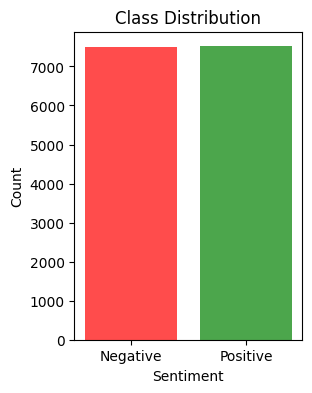

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1, 3, 1)
plt.bar(['Negative','Positive'],df['target'].value_counts().sort_index().values,color=['red','green'],alpha=0.7)
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## 2. Tweet Length Histogram


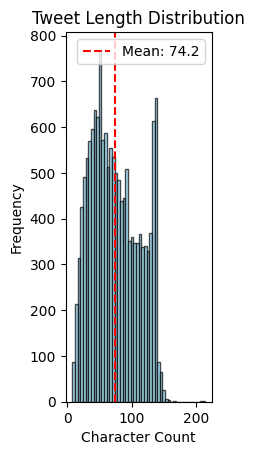

In [36]:
plt.subplot(1, 3, 2)
tweet_lengths = df['text'].str.len()
plt.hist(tweet_lengths, bins=50, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Tweet Length Distribution')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.axvline(tweet_lengths.mean(), color='red', linestyle='--', 
            label=f'Mean: {tweet_lengths.mean():.1f}')
plt.legend()
plt.show()

This line adds a vertical reference line to the histogram to mark the average tweet length. Let me break it down in detail:

## `plt.axvline()` - The Function
- `axvline` stands for "**ax**is **v**ertical **line**"
- It draws a vertical line across the entire y-range of the plot at a specified x-position

## Parameters Explained:

### `tweet_lengths.mean()`
- **What it does**: Calculates the average length of all tweets
- **Example**: If tweets have lengths [50, 120, 80, 200], the mean would be (50+120+80+200)/4 = 112.5
- **This becomes the x-position** where the vertical line is drawn

### `color='red'`
- Sets the line color to red so it stands out against the blue histogram bars

### `linestyle='--'`
- Uses a dashed line style (`--`) instead of a solid line
- Common line styles: `'-'` (solid), `'--'` (dashed), `'-.'` (dash-dot), `':'` (dotted)

### `label=f'Mean: {tweet_lengths.mean():.1f}'`
- **`f'...'`**: This is an f-string (formatted string)
- **`{tweet_lengths.mean()}`**: Inserts the calculated mean value
- **`:.1f`**: Formats the number to 1 decimal place (e.g., 112.5 instead of 112.5234)
- **Result**: Creates a label like `"Mean: 112.5"` for the legend

## Visual Result:
```
Frequency
   ↑
   |       ████
   |      ████████
   |     ████████████
   |    ████████████████
   |   ████████████████████
   |  ---|------------------→ Length
   |    112.5 (red dashed line)
   |
```

## Why This is Useful:
1. **Quick reference**: Immediately shows where the average falls in the distribution
2. **Skew detection**: If the mean is far from the histogram's peak, it indicates skewed data
3. **Outlier awareness**: Long tweets pull the mean to the right, revealing outliers

## Example Scenario:
If most tweets are 50-100 characters but the mean is 150, this suggests there are some very long tweets dragging the average up.

## Without this line:
You'd just see the histogram bars and would have to mentally estimate where the average falls.

## Related Functions:
- `plt.axhline()`: Draws a horizontal line
- `plt.vlines()`: Draws multiple vertical lines at once
- `plt.axvspan()`: Draws a vertical shaded region

This single line provides crucial statistical context to help interpret the distribution shape at a glance!

## 3. Top Frequent Tokens


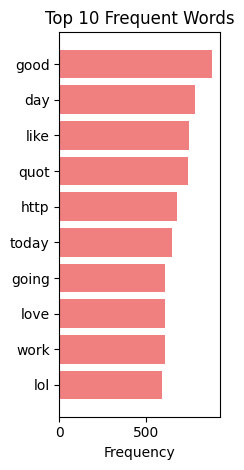

In [37]:
import re
from collections import Counter
import spacy

nlp=spacy.load('en_core_web_sm')
plt.subplot(1, 3, 3)
all_words=[]
for text in df['text']:
 word=re.findall(r'\b\w+\b',text.lower())
 all_words.extend(word)

stopwords = nlp.Defaults.stop_words
word_freq = Counter([word for word in all_words if word not in stopwords and len(word)>2])
top_words=word_freq.most_common(10)
words, counts = zip(*top_words)
plt.barh(words, counts, color='lightcoral')
plt.title('Top 10 Frequent Words')
plt.xlabel('Frequency')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


In [38]:
import numpy as np
print("\n" + "="*50)
print("SAMPLE TWEETS")
print("="*50)
np.random.seed(42)
sample_tweets = np.random.choice(df.index, 5, replace=False)
for i , row in enumerate(sample_tweets,1):
    tweet=df.iloc[row]
    sentiment='Positive' if tweet['target']==4 else 'Negative'
    print(f"\nSample {i} ({sentiment}):")
    print(f"User: {tweet['user']}")
    print(f"Date: {tweet['date']}")
    print(f"Text: {tweet['text']}")
    print(f"Length: {len(tweet['text'])} characters")
    print("-" * 80)


SAMPLE TWEETS

Sample 1 (Negative):
User: SydMonk
Date: Thu Jun 25 00:03:22 PDT 2009
Text: Ice cream is all I can tolerate. 
Length: 33 characters
--------------------------------------------------------------------------------

Sample 2 (Negative):
User: Alessandral89
Date: Mon Jun 15 13:56:12 PDT 2009
Text: feeling down 
Length: 13 characters
--------------------------------------------------------------------------------

Sample 3 (Negative):
User: pezholio
Date: Tue Jun 16 01:57:08 PDT 2009
Text: @nickbrickett Ah cool, turnns out I might be too skint to get one  at the moment anyway! 
Length: 89 characters
--------------------------------------------------------------------------------

Sample 4 (Negative):
User: bijunea
Date: Sun Jun 07 06:33:15 PDT 2009
Text: New on Etsy: Baseball stud earrings 7$  http://bit.ly/7S33G
Length: 59 characters
--------------------------------------------------------------------------------

Sample 5 (Negative):
User: NightShade10
Date: Sun May 31 08

## removing @ ,links , mentions 

In [39]:
list_of_tweets = [df.iloc[row]['text'] for i , row in enumerate(df.index,1)]
print('Tweets before cleaning:\n')
for tweet in list_of_tweets:
    print(tweet)
cleaned_tweets = []
for tweet in list_of_tweets:
 cleaned = re.sub(r'(@\w+|#\w+|http\S+|www\S+|https\S+|[^\w\s])', '', tweet, flags=re.MULTILINE)
 cleaned = re.sub(r'\b\d+\b', '<NUM>', cleaned)  # Replace numbers with <NUM>

 cleaned = ' '.join(cleaned.split())  # Remove extra spaces, keep words separated
 cleaned_tweets.append(cleaned) 
print('\nTweet after cleaning:\n')
print(tweet)

removed_words=[]
for orig, cleaned in zip(list_of_tweets, cleaned_tweets):
    orig_words = set(orig.split())
    cleaned_words = set(cleaned.split())
    removed_words.append( orig_words - cleaned_words)
    print("-" * 60)
print('removed tweets:\n')
for words in removed_words:
    if words != set():
     print(words)


Tweets before cleaning:

@chrishasboobs AHHH I HOPE YOUR OK!!! 
@misstoriblack cool , i have no tweet apps  for my razr 2
@TiannaChaos i know  just family drama. its lame.hey next time u hang out with kim n u guys like have a sleepover or whatever, ill call u
School email won't open  and I have geography stuff on there to revise! *Stupid School* :'(
upper airways problem 
Going to miss Pastor's sermon on Faith... 
on lunch....dj should come eat with me 
@piginthepoke oh why are you feeling like that? 
gahh noo!peyton needs to live!this is horrible 
@mrstessyman thank you glad you like it! There is a product review bit on the site  Enjoy knitting it!
@PerezHilton Zach makes me pee sitting down! And I'm a grown gay man! 
to sum up my day in one word ......... kackered! 
@k9wkj Great minds think alike 
Is Poorly and in bed! 
@LilPecan Oh, that's really great  Here we have a small blizzard and also cold wind blows...
@wizely lol, calm down.  i got a 30day loan offer for only 1500% 
i'm fee

In [40]:
cleaned_tweets

['AHHH I HOPE YOUR OK',
 'cool i have no tweet apps for my razr <NUM>',
 'i know just family drama its lamehey next time u hang out with kim n u guys like have a sleepover or whatever ill call u',
 'School email wont open and I have geography stuff on there to revise Stupid School',
 'upper airways problem',
 'Going to miss Pastors sermon on Faith',
 'on lunchdj should come eat with me',
 'oh why are you feeling like that',
 'gahh noopeyton needs to livethis is horrible',
 'thank you glad you like it There is a product review bit on the site Enjoy knitting it',
 'Zach makes me pee sitting down And Im a grown gay man',
 'to sum up my day in one word kackered',
 'Great minds think alike',
 'Is Poorly and in bed',
 'Oh thats really great Here we have a small blizzard and also cold wind blows',
 'lol calm down i got a 30day loan offer for only <NUM>',
 'im feeling quite sleepy today wish i could stay in bed todaybut OK is my LAST YEAR so lets go to school',
 'Yeah Mathieu totally choked in

In [41]:
np.random.seed(42)

sample_tweets=list_of_tweets[0:5]
print('Sample Tweets before cleaning:\n')
for tweet in sample_tweets:
    print(tweet)
print('\nSample Tweets After cleaning:\n')
sample_tweets=cleaned_tweets[0:5]

for tweet in sample_tweets:
    print(tweet)


Sample Tweets before cleaning:

@chrishasboobs AHHH I HOPE YOUR OK!!! 
@misstoriblack cool , i have no tweet apps  for my razr 2
@TiannaChaos i know  just family drama. its lame.hey next time u hang out with kim n u guys like have a sleepover or whatever, ill call u
School email won't open  and I have geography stuff on there to revise! *Stupid School* :'(
upper airways problem 

Sample Tweets After cleaning:

AHHH I HOPE YOUR OK
cool i have no tweet apps for my razr <NUM>
i know just family drama its lamehey next time u hang out with kim n u guys like have a sleepover or whatever ill call u
School email wont open and I have geography stuff on there to revise Stupid School
upper airways problem


## Case Folding & Tokenization

In [42]:
import spacy
print(len(cleaned_tweets))
texts=''
for text in cleaned_tweets:
 text =text.lower()
 texts+=text
nlp=spacy.load('en_core_web_sm')
doc=nlp(texts)
sent_tokens =[token for token in doc.sents] 
word_tokens=[token.text for token in doc]
print('Sentence Tokens:\n',sent_tokens)
print('Word Tokens:\n',word_tokens)


15000
Sentence Tokens:
 [ahhh i hope your okcool, i have no tweet apps for my razr <num>i know just family drama its lamehey next time u hang out with kim n u guys like have a sleepover or whatever ill call uschool email wont open, and i have geography stuff on there to revise stupid schoolupper airways problemgoing to miss pastors sermon on faithon lunchdj should come eat with meoh why are you feeling like thatgahh noopeyton needs to livethis is horriblethank, you glad you like it there is a product review bit on the site enjoy knitting itzach makes me pee sitting down, and im a grown gay manto sum up my day in one word kackeredgreat minds think alikeis poorly and in bedoh thats really great here we have a small blizzard and also cold wind blowslol calm down, i got a 30day loan offer for only <num>im feeling quite sleepy today wish i could stay in bed, todaybut ok is my last year so lets go to schoolyeah mathieu totally choked in the 3rd set to let rog win as well djokovic played terr

In [43]:
vocab_before = set()
for tweet in list_of_tweets:
    vocab_before.update(tweet.lower().split())

vocab_after = set()
for tweet in cleaned_tweets:
    vocab_after.update(tweet.lower().split())

print("Vocabulary size before cleaning:", len(vocab_before))
print("Vocabulary size after cleaning:", len(vocab_after))

Vocabulary size before cleaning: 36566
Vocabulary size after cleaning: 19277


##  Stopwords, Punctuation, and Numbers

In [44]:
print('Removing Stopwords, Punctuation, and Numbers with Spacy\n')
filtered_tokens=[token for token in doc if not token.is_stop and token.is_alpha]
print("spaCy Stopwords Removed: \n\n", filtered_tokens)

print("spaCy Stopwords : \n\n", [token for token  in  doc if token.is_stop])


Removing Stopwords, Punctuation, and Numbers with Spacy

spaCy Stopwords Removed: 

 [ahhh, hope, okcool, tweet, apps, razr, num, know, family, drama, lamehey, time, u, hang, kim, n, u, guys, like, sleepover, ill, uschool, email, wo, nt, open, geography, stuff, revise, stupid, schoolupper, airways, problemgoing, miss, pastors, sermon, faithon, lunchdj, come, eat, meoh, feeling, like, thatgahh, noopeyton, needs, livethis, horriblethank, glad, like, product, review, bit, site, enjoy, knitting, itzach, makes, pee, sitting, m, grown, gay, manto, sum, day, word, kackeredgreat, minds, think, alikeis, poorly, bedoh, s, great, small, blizzard, cold, wind, blowslol, calm, got, loan, offer, num, im, feeling, sleepy, today, wish, stay, bed, todaybut, ok, year, lets, schoolyeah, mathieu, totally, choked, set, let, rog, win, djokovic, played, terriblyugh, mornings, rough, startjust, bit, tongueapparently, nt, time, ur, fanswhaddup, whaddup, whaddup, whaddup, whaddup, got, white, girl, swag, head, s

**Choice:**  
I chose to **remove punctuation** and **replace numbers with `<NUM>`**.

**Explanation:**  
- **Punctuation** usually does not carry sentiment or semantic meaning in tweets for sentiment analysis, so removing it helps reduce noise and vocabulary size.
- **Numbers** can sometimes be important (e.g., "won 100 dollars"), but their exact value is less important than the fact that a number is present. Replacing numbers with `<NUM>` keeps the information that a number appeared, without increasing the vocabulary size with many unique numbers.

**Example:**  
- Original: `"I have 2 cats, 1 dog, and $100!"`  
- Cleaned: `"I have <NUM> cats <NUM> dog and NUM"`

This approach improves generalization and model performance for most NLP tasks.

## Stemming vs Lemmatization

In [45]:
from nltk import PorterStemmer
import spacy

stemmer = PorterStemmer()
nlp = spacy.load('en_core_web_sm')

sample_words = [token.text for token in filtered_tokens[:20]]

stems = [stemmer.stem(w) for w in sample_words]

doc = nlp(' '.join(sample_words))
lemmas_spacy = [(token.text, token.lemma_) for token in doc]

print("# ------------------------")
print("# NLTK Stemming vs spaCy Lemmatization")
print("# ------------------------")
print("Word\t\tStem\t\tLemma")
for word, stem, (tok, lemma) in zip(sample_words, stems, lemmas_spacy):
    print(f"{word:12}\t{stem:12}\t{lemma:12}")

# ------------------------
# NLTK Stemming vs spaCy Lemmatization
# ------------------------
Word		Stem		Lemma
ahhh        	ahhh        	ahhh        
hope        	hope        	hope        
okcool      	okcool      	okcool      
tweet       	tweet       	tweet       
apps        	app         	app         
razr        	razr        	razr        
num         	num         	num         
know        	know        	know        
family      	famili      	family      
drama       	drama       	drama       
lamehey     	lamehey     	lamehey     
time        	time        	time        
u           	u           	u           
hang        	hang        	hang        
kim         	kim         	kim         
n           	n           	n           
u           	u           	u           
guys        	guy         	guy         
like        	like        	like        
sleepover   	sleepov     	sleepover   


## Train quick models with both and compare results.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import spacy
nlp = spacy.load('en_core_web_sm')

# Create filtered tokens per tweet (removing stopwords and non-alpha)
filtered_tweets = []
for tweet in cleaned_tweets:
    doc = nlp(tweet)
    tokens = [token.text for token in doc if not token.is_stop and token.is_alpha]
    filtered_tweets.append(' '.join(tokens))

X = filtered_tweets
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

def stem_preprocessor(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

def lemma_preproceesor(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

stem_pipe = Pipeline([
    ('vect', CountVectorizer(preprocessor=stem_preprocessor)),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression())
])

lemma_pipe = Pipeline([
    ('vect', CountVectorizer(preprocessor=lemma_preproceesor)),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression(max_iter=200))
])

stem_pipe.fit(X_train, y_train)
y_pred_stem = stem_pipe.predict(X_test)
print("Stemming Model Performance:\n")
print(confusion_matrix(y_test, y_pred_stem))
print(classification_report(y_test, y_pred_stem))

print("\nLemmatization Results:")
lemma_pipe.fit(X_train, y_train)
y_pred_lemma = lemma_pipe.predict(X_test)
print("Lemmatization Model Performance:\n")
print(confusion_matrix(y_test, y_pred_lemma))
print(classification_report(y_test, y_pred_lemma))

Stemming Model Performance:

[[1058  435]
 [ 352 1155]]
              precision    recall  f1-score   support

    negative       0.75      0.71      0.73      1493
    positive       0.73      0.77      0.75      1507

    accuracy                           0.74      3000
   macro avg       0.74      0.74      0.74      3000
weighted avg       0.74      0.74      0.74      3000


Lemmatization Results:
Lemmatization Model Performance:

[[1027  466]
 [ 368 1139]]
              precision    recall  f1-score   support

    negative       0.74      0.69      0.71      1493
    positive       0.71      0.76      0.73      1507

    accuracy                           0.72      3000
   macro avg       0.72      0.72      0.72      3000
weighted avg       0.72      0.72      0.72      3000



## POS Tagging (extra features)

In [48]:
import spacy
import numpy as np
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

nlp = spacy.load('en_core_web_sm')

# 1. Compute POS counts for each tweet
def get_pos_counts(text):
    doc = nlp(text)
    noun = sum(1 for token in doc if token.pos_ == "NOUN")
    verb = sum(1 for token in doc if token.pos_ == "VERB")
    adj  = sum(1 for token in doc if token.pos_ == "ADJ")
    return [noun, verb, adj]

# X_text: filtered tweets (already preprocessed, one string per tweet)
X_text = filtered_tweets
X_pos = np.array([get_pos_counts(tweet) for tweet in X_text])
y = df['target']

# 2. Split data
X_text_train, X_text_test, X_pos_train, X_pos_test, y_train, y_test = train_test_split(
    X_text, X_pos, y, random_state=42, test_size=0.2
)

# 3. Custom transformer for POS features
class PosFeatureExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X

# 4. Pipeline with POS features
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Combine text and POS features
preprocessor = ColumnTransformer([
    ('vect', Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer())
    ]), 0),
    ('pos', Pipeline([
        ('scaler', StandardScaler())
    ]), 1)
])

class CombinedFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        # X is a tuple: (text, pos)
        return np.hstack([X[0], X[1]])

# Prepare input for pipeline
X_train_combined = list(zip(X_text_train, X_pos_train))
X_test_combined = list(zip(X_text_test, X_pos_test))

# Pipeline with POS features
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

pipeline_with_pos = make_pipeline(
    make_column_transformer(
        (CountVectorizer(), 0),
        (StandardScaler(), 1),
        remainder='drop'
    ),
    FeatureUnion([
        ('text', Pipeline([
            ('vect', CountVectorizer()),
            ('tfidf', TfidfTransformer())
        ])),
        ('pos', Pipeline([
            ('scaler', StandardScaler())
        ]))
    ]),
    LogisticRegression(max_iter=200)
)

# For scikit-learn compatibility, use a DataFrame for X
import pandas as pd
X_train_df = pd.DataFrame({'text': X_text_train, 'pos': list(X_pos_train)})
X_test_df = pd.DataFrame({'text': X_text_test, 'pos': list(X_pos_test)})

from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Final pipeline with text and POS features
preprocessor = ColumnTransformer([
    ('vect', CountVectorizer(), 'text'),
    ('pos', StandardScaler(), ['noun', 'verb', 'adj'])
])

# Add POS columns to DataFrame
X_train_df[['noun', 'verb', 'adj']] = pd.DataFrame(X_train_df['pos'].tolist(), index=X_train_df.index)
X_test_df[['noun', 'verb', 'adj']] = pd.DataFrame(X_test_df['pos'].tolist(), index=X_test_df.index)

pipeline_with_pos = Pipeline([
    ('pre', preprocessor),
    ('clf', LogisticRegression(max_iter=200))
])

pipeline_with_pos.fit(X_train_df, y_train)
y_pred_pos = pipeline_with_pos.predict(X_test_df)

print("Model with POS features:\n")
print(confusion_matrix(y_test, y_pred_pos))
print(classification_report(y_test, y_pred_pos))

# For comparison: model without POS features
pipeline_text_only = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression(max_iter=200))
])
pipeline_text_only.fit(X_text_train, y_train)
y_pred_text = pipeline_text_only.predict(X_text_test)

print("Model WITHOUT POS features:\n")
print(confusion_matrix(y_test, y_pred_text))
print(classification_report(y_test, y_pred_text))

Model with POS features:

[[1028  465]
 [ 351 1156]]
              precision    recall  f1-score   support

    negative       0.75      0.69      0.72      1493
    positive       0.71      0.77      0.74      1507

    accuracy                           0.73      3000
   macro avg       0.73      0.73      0.73      3000
weighted avg       0.73      0.73      0.73      3000

Model WITHOUT POS features:

[[1047  446]
 [ 364 1143]]
              precision    recall  f1-score   support

    negative       0.74      0.70      0.72      1493
    positive       0.72      0.76      0.74      1507

    accuracy                           0.73      3000
   macro avg       0.73      0.73      0.73      3000
weighted avg       0.73      0.73      0.73      3000



## Text Representation BoW and TfiDf

In [49]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
# X_text: filtered tweets (already preprocessed, one string per tweet)
X_text = filtered_tweets
X_pos = np.array([get_pos_counts(tweet) for tweet in X_text])
y = df['target']

# 2. Split data
X_text_train, X_text_test, X_pos_train, X_pos_test, y_train, y_test = train_test_split(
    X_text, X_pos, y, random_state=42, test_size=0.2
)
vectorizer=CountVectorizer()
X_train_bow=vectorizer.fit_transform(X_text_train)
X_test_bow=vectorizer.transform(X_text_test)

X_train_bow = X_train_bow.toarray()
X_test_bow = X_test_bow.toarray()

X_train_combined = np.hstack([X_train_bow, X_pos_train])
X_test_combined = np.hstack([X_test_bow, X_pos_test])
print("BoW representation of training data:")
print(X_train_bow)



BoW representation of training data:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [50]:
tfidf=TfidfTransformer()
X_train_tfidf=tfidf.fit_transform(X_train_bow)
X_test_tfidf=tfidf.transform(X_test_bow)
print("TF-IDF matrix for training data:")
print(X_train_tfidf.toarray())

print("\nTF-IDF matrix for test data:")
print(X_test_tfidf.toarray())

TF-IDF matrix for training data:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

TF-IDF matrix for test data:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [51]:
!pip install gensim


In [52]:
word_tokens

['ahhh',
 'i',
 'hope',
 'your',
 'okcool',
 'i',
 'have',
 'no',
 'tweet',
 'apps',
 'for',
 'my',
 'razr',
 '<',
 'num',
 '>',
 'i',
 'know',
 'just',
 'family',
 'drama',
 'its',
 'lamehey',
 'next',
 'time',
 'u',
 'hang',
 'out',
 'with',
 'kim',
 'n',
 'u',
 'guys',
 'like',
 'have',
 'a',
 'sleepover',
 'or',
 'whatever',
 'ill',
 'call',
 'uschool',
 'email',
 'wo',
 'nt',
 'open',
 'and',
 'i',
 'have',
 'geography',
 'stuff',
 'on',
 'there',
 'to',
 'revise',
 'stupid',
 'schoolupper',
 'airways',
 'problemgoing',
 'to',
 'miss',
 'pastors',
 'sermon',
 'on',
 'faithon',
 'lunchdj',
 'should',
 'come',
 'eat',
 'with',
 'meoh',
 'why',
 'are',
 'you',
 'feeling',
 'like',
 'thatgahh',
 'noopeyton',
 'needs',
 'to',
 'livethis',
 'is',
 'horriblethank',
 'you',
 'glad',
 'you',
 'like',
 'it',
 'there',
 'is',
 'a',
 'product',
 'review',
 'bit',
 'on',
 'the',
 'site',
 'enjoy',
 'knitting',
 'itzach',
 'makes',
 'me',
 'pee',
 'sitting',
 'down',
 'and',
 'i',
 'm',
 'a',
 

In [53]:
from gensim.models import Word2Vec
sentences = []
for tweet in filtered_tweets:
    doc = nlp(tweet)
    tokens = [token.text for token in doc if not token.is_stop and token.is_alpha]
    if tokens:  # skip empty
        sentences.append(tokens)

cbow_model = Word2Vec(
    sentences,
    vector_size=100,
    window=2,
    min_count=1,  # use 1 or higher, -1 is invalid
    sg=0
)
print("CBOW Model Word Vectors:\n")

for word in cbow_model.wv.index_to_key[:10]:  # print only first 10 for brevity
    print(f"Word: {word}, Vector: {cbow_model.wv[word]}")

CBOW Model Word Vectors:

Word: nt, Vector: [-0.17554459  0.49781808  0.2721297   0.2840795  -0.09262784 -0.64810854
  0.3853562   1.1378654  -0.43793866 -0.39301106 -0.30315447 -0.7174504
  0.01674776  0.28680256  0.19815326 -0.42568707  0.18698408 -0.38824266
  0.00251628 -0.9404347   0.26572683  0.22627673  0.2978826  -0.15694506
  0.03390028  0.05747281 -0.3785207  -0.197957   -0.5786802   0.13540548
  0.31154388 -0.04356501  0.12391368 -0.51029915  0.02163631  0.58072424
  0.19420934 -0.42620558 -0.39832246 -0.8166838   0.17321305 -0.3913086
 -0.32589757  0.15599452  0.3497277  -0.16163036 -0.4522531  -0.06175864
  0.31890154  0.3088681   0.09206005 -0.47375822 -0.39849535  0.01299751
 -0.35729653  0.31482977  0.38116556 -0.00180578 -0.5183565   0.2919117
  0.04691457  0.16881055 -0.14188305 -0.05719176 -0.5572586   0.629813
  0.26135015  0.5056546  -0.7422143   0.6226026  -0.2647796   0.42658412
  0.6639117  -0.21597828  0.50864285  0.16956277  0.12157922  0.12118462
 -0.59144366

## Compare vocabulary sizes and representation dimensions.

In [54]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np


print("BoW vocabulary size:", len(vectorizer.vocabulary_))
print("BoW representation dimension:", X_train_bow.shape[1])

print("TF-IDF vocabulary size:", len(vectorizer.vocabulary_))
print("TF-IDF representation dimension:", X_train_tfidf.shape[1])

# Word2Vec (embedding average)
# Assume you already have sentences and cbow_model as in your previous cell
embedding_dim = cbow_model.vector_size
X_w2v = []
for tokens in sentences:
    vectors = [cbow_model.wv[word] for word in tokens if word in cbow_model.wv]
    if vectors:
        X_w2v.append(np.mean(vectors, axis=0))
    else:
        X_w2v.append(np.zeros(embedding_dim))
X_w2v = np.array(X_w2v)
print("Word2Vec vocabulary size:", len(cbow_model.wv))
print("Word2Vec representation dimension:", X_w2v.shape[1])

BoW vocabulary size: 15843
BoW representation dimension: 15843
TF-IDF vocabulary size: 15843
TF-IDF representation dimension: 15843
Word2Vec vocabulary size: 22031
Word2Vec representation dimension: 100


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

y_pred_bow = clf_bow.predict(X_test_bow)
acc_bow = accuracy_score(y_test, y_pred_bow)
print("BoW Accuracy:", acc_bow)
print("BoW F1 score:", f1_score(y_test, y_pred_bow, average='weighted'))

y_pred_tfidf = clf_tfidf.predict(X_test_tfidf)
acc_tfidf = accuracy_score(y_test, y_pred_tfidf)
print("TF-IDF Accuracy:", acc_tfidf)
print("TF-IDF F1 score:", f1_score(y_test, y_pred_tfidf, average='weighted'))



BoW Accuracy: 0.7243333333333334
BoW F1 score: 0.7238929783534662
TF-IDF Accuracy: 0.73
TF-IDF F1 score: 0.7297635979242744


| Preprocessing | Representation | Model               | Accuracy | F1-score |
| ------------- | -------------- | ------------------- | -------- | -------- |
| Clean + lower | TF-IDF         | Logistic Regression | 0.73     | 0.729    |
| Clean + stem  | BoW            | Naive Bayes         | 0.72     | 0.72     |


## Modeling with Pipelines

In [56]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

models = {
    "MultinomialNB": MultinomialNB(),
    "LogisticRegression": LogisticRegression(max_iter=200),
    "LinearSVM": LinearSVC(max_iter=200)
}

results = []

for name, clf in models.items():
    pipeline_with_pos.fit(X_train_df, y_train)
    y_pred = pipeline_with_pos.predict(X_test_df)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, pos_label='positive', average='binary')
    results.append([name, acc, f1])
    print(f"\n{name} classification report:\n")
    print(classification_report(y_test, y_pred))

import pandas as pd
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1-score"])
print("\nComparison Table:")
print(results_df)


MultinomialNB classification report:

              precision    recall  f1-score   support

    negative       0.75      0.69      0.72      1493
    positive       0.71      0.77      0.74      1507

    accuracy                           0.73      3000
   macro avg       0.73      0.73      0.73      3000
weighted avg       0.73      0.73      0.73      3000


LogisticRegression classification report:

              precision    recall  f1-score   support

    negative       0.75      0.69      0.72      1493
    positive       0.71      0.77      0.74      1507

    accuracy                           0.73      3000
   macro avg       0.73      0.73      0.73      3000
weighted avg       0.73      0.73      0.73      3000


LinearSVM classification report:

              precision    recall  f1-score   support

    negative       0.75      0.69      0.72      1493
    positive       0.71      0.77      0.74      1507

    accuracy                           0.73      3000
   macro a

## Evaluation & Error Analysis


In [57]:
# Use the best model (for example, Logistic Regression) for error analysis
best_pipe = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=200))
])
best_pipe.fit(X_train_df['text'], y_train)
y_pred = best_pipe.predict(X_test_df['text'])

from sklearn.metrics import confusion_matrix, classification_report

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Show 10 misclassified tweets
X_test_df = X_test_df.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

misclassified_idx = (y_pred != y_test.values)
misclassified = X_test_df[misclassified_idx].copy()
misclassified['true'] = y_test[misclassified_idx].values
misclassified['pred'] = y_pred[misclassified_idx]

print("\n10 Misclassified Tweets:")
for i, row in misclassified.head(10).iterrows():
    print(f"Tweet: {row['text']}")
    print(f"True label: {row['true']}, Predicted: {row['pred']}")
    print("-" * 60)


Confusion Matrix:
[[1047  446]
 [ 364 1143]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.74      0.70      0.72      1493
    positive       0.72      0.76      0.74      1507

    accuracy                           0.73      3000
   macro avg       0.73      0.73      0.73      3000
weighted avg       0.73      0.73      0.73      3000


10 Misclassified Tweets:
Tweet: Ice cream tolerate
True label: negative, Predicted: positive
------------------------------------------------------------
Tweet: Ah cool turnns skint moment
True label: negative, Predicted: positive
------------------------------------------------------------
Tweet: m like bored staring armsthe autographs hands kinda fading away arm parts r der
True label: positive, Predicted: negative
------------------------------------------------------------
Tweet: blushing happened awards texted ampasked world
True label: positive, Predicted: negative
------------------------

## Save Model Pipeline (Pickle)

In [58]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Assuming you already have X_train, y_train
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", LogisticRegression())
])

pipeline.fit(X_train, y_train)

# Save the trained pipeline
with open("sentiment_model.pkl", "wb") as f:
    pickle.dump(pipeline, f)
